<a href="https://colab.research.google.com/github/pedrovg97/U2T3/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx==2.6.2

In [ ]:
!pip install wikipedia

In [ ]:
from operator import itemgetter
import networkx as nx
import wikipedia
from collections import deque


In [ ]:
nx.__version__

'2.6.2'

Requisito #01

In [ ]:
#https://en.wikipedia.org/wiki/Complex_network
SEED = ["Club de Regatas Vasco da Gama", "Clube de Regatas do Flamengo", "Botafogo de Futebol e Regatas", "Fluminense Football Club"]

STOPS = ("edit", "page", "references", "external links", "see also", "navigation", "contents",
    "referências", "ligações externas", "ver também", "navegação", "conteúdo",
    "category", "categories", "portal", "template", "wikipedia", "wikimedia", "media",
    "help", "talk", "about", "article", "section", "history", "main", "talk", "view",
    "create", "source", "view history", "edit links", "privacy policy", "disclaimers",
    "citar", "editar", "página", "anterior", "seguinte", "alterar", "ferramentas",
    "páginas afluentes", "alterações relacionadas", "carregar ficheiro", "páginas especiais",
    "ligar informação", "item wikidata", "imprimir", "descarregar pdf", "ligação permanente",
    "informações da página", "citar esta página", "elemento wikidata", "criar uma ligação",
    "páginas que usam esta ligação", "citar este artigo", "línguas", "mapa do site", "logótipo",
    "definir imagem de destaque", "aviso médico", "aviso financeiro", "aviso de cookies",
    "simples", "criar", "criação", "novembro", "fevereiro", "artigo", "comentário", "imagem",
    "texto", "conceito", "software", "base", "projeto", "dados", "processamento", "método",
    "ferramenta", "tipo", "modelo", "algoritmo", "técnica", "abordagem", "aplicação",
    "disciplina", "tarefa", "termo", "teoria", "sistema", "desenvolvimento", "tecnologia",
    "área", "ano", "revista", "conferência", "curso", "universidade", "instituto", "laboratório",
    "escola", "professor", "pesquisa", "estudo", "avaliação", "resultado", "conclusão",
    "publicação", "autor", "co-autor", "referência", "link", "bibliografia", "notas",
    "editar código-fonte", "ver histórico", "ligações externas", "desambiguação", "editar código-fonte",
    "editar", "citar esta página",
    "football", "soccer", "club", "team", "player", "stadium", "coach", "match", "championship",
    "league", "cup", "history", "founder", "founded", "foundation", "historical", "record", "players",
    "honors", "kit", "colors", "supporters", "rivalry", "season", "performance", "current", "squad",
    "president", "management", "manager", "coaches", "competitions", "national", "international",
    "champions", "titles", "trophies", "achievements", "club's", "club history", "club's history",
    "current squad", "club's squad", "club records", "club's records", "club honors", "club's honors",
    "notable players", "former players", "club colors", "club's colors", "kits", "club's kits",
    "stadium information", "club's stadium", "club supporters", "club's supporters", "rivalries",
    "club's rivalries", "club achievements", "club's achievements", "coaching staff", "club's management",
    "club's president", "club's manager", "club's coaches", "club's competitions", "club's national",
    "club's international", "club's championships", "club's titles", "club's trophies", "club season",
    "club's performance", "club's current", "club's board", "club's players", "club's current squad",
    "club's former players", "club's notable players", "jogadores")

In [ ]:
todo_lst = deque()
todo_set = set(SEED)
done_set = set()

In [ ]:
# Adicione as sementes à lista de tarefas
for seed in SEED:
    todo_lst.append((0, seed))
    todo_set.add(seed)

print(todo_set)

{'Botafogo de Futebol e Regatas', 'Clube de Regatas do Flamengo', 'Fluminense Football Club', 'Club de Regatas Vasco da Gama'}


In [ ]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [ ]:
%%time
while layer < 2:  # Remove the name page of the current page from the todo_lst,
  # and add it to the set of processed pages.
  # If the script encounters this page again, it will skip over it.

  #layer, page = todo_lst.popleft()

  del todo_lst[0]
  done_set.add(page)

  # Show progress
  print(layer, page)

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue

  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

In [ ]:
print ("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

138862 nodes, 618369 edges


In [ ]:
original = g.copy()


In [ ]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[]
[('French-Language', 'French Language'), ('Izu-Ōshima', 'Izu Ōshima'), ('Ali Al-Bulaihi', 'Ali Al Bulaihi'), ('Shabab Al-Ahli Club', 'Shabab Al Ahli Club'), ('Goal-Line Technology', 'Goal Line Technology'), ('Radio-Controlled Car', 'Radio Controlled Car'), ('Tee-Ball', 'Tee Ball'), ('El Niño-Southern Oscillation', 'El Niño Southern Oscillation'), ('Vice-President', 'Vice President'), ('South American Under-17 Football Championship', 'South American Under 17 Football Championship'), ('Jean-Paul Prates', 'Jean Paul Prates'), ('Sharm El-Sheikh', 'Sharm El Sheikh'), ('1999 South American Under-17 Football Championship', '1999 South American Under 17 Football Championship'), ('European Sovereign-Debt Crisis', 'European Sovereign Debt Crisis'), ('Free-Market', 'Free Market'), ('Paulinho Villas-Boas', 'Paulinho Villas Boas'), ('Left-Back', 'Left Back'), ('Free-Trade Agreement', 'Free Trade Agreement'), ('Joaquín Torres-García', 'Joaquín Torres García'), ('Kho-Kho', 'Kho Kho'), ('Kilowatt-H

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))


138387 nodes, 617929 edges


In [ ]:


# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "cna.graphml")


print("Nodes removed: {:.2f}%".format(100*(1 - 3420/13775)))
print("Edges removed: {:.2f}%".format(100*(1 - 14771/24856)))
print("Edges per nodes: {:.2f}".format(13775/3420))

49452 nodes, 528994 edges
Nodes removed: 75.17%
Edges removed: 40.57%
Edges per nodes: 4.03


In [ ]:
nx.write_graphml(gsub, "cna.graphml")


Requisito #02:


Degree Centrality (Centralidade de Grau):

Definição: A centralidade de grau de um nó é simplesmente o número de arestas conectadas a esse nó. Em termos leigos, é a quantidade de conexões que um nó possui.
Interpretação: Um nó com alta centralidade de grau é altamente conectado na rede. Na perspectiva social, isso poderia representar uma pessoa com muitos amigos ou contatos.
Betweenness Centrality (Centralidade de Intermediação):

Definição: A centralidade de intermediação de um nó mede quantas vezes um nó age como ponte ao longo do caminho mais curto entre dois outros nós na rede.
Interpretação: Um nó com alta centralidade de intermediação tem um papel significativo na comunicação e na transferência de informações entre partes distintas da rede. É como um intermediário eficaz.
Closeness Centrality (Centralidade de Proximidade):

Definição: A centralidade de proximidade de um nó é inversamente proporcional à soma das distâncias mais curtas entre esse nó e todos os outros nós na rede.
Interpretação: Um nó com alta centralidade de proximidade está geograficamente próximo de outros nós na rede. Isso implica que o nó pode alcançar rapidamente outros nós na rede, facilitando a rápida disseminação de informações ou influência.
Eigenvector Centrality (Centralidade de Autovetor):

Definição: A centralidade de autovetor de um nó é uma medida que considera a centralidade dos nós aos quais um nó está conectado.
Interpretação: Um nó com alta centralidade de autovetor está conectado a outros nós que também são centralmente importantes. Isso reflete a ideia de que a importância de um nó não é apenas pelo número de conexões, mas também pela importância dos nós aos quais está conectado.


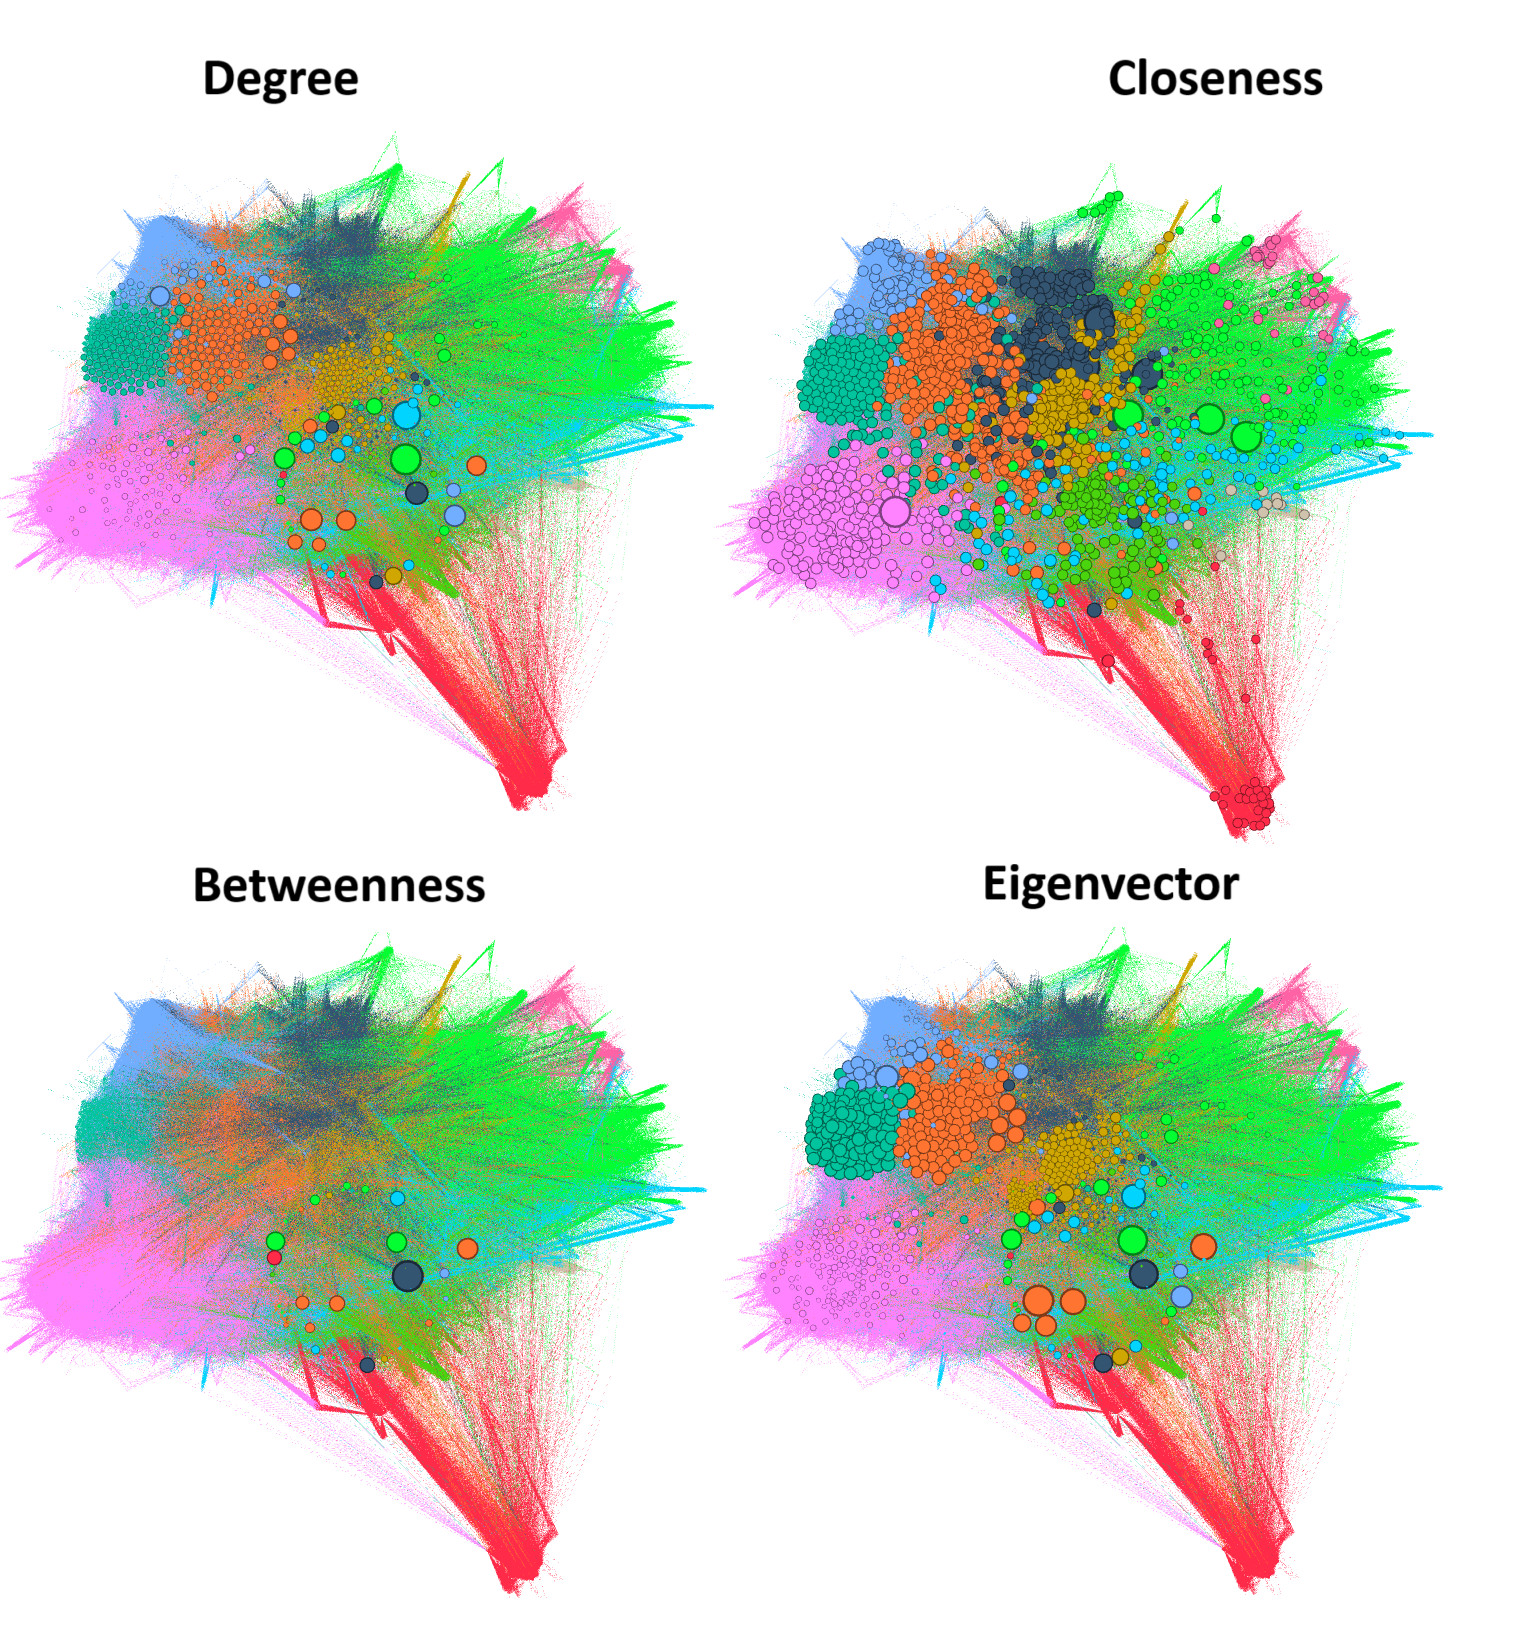

Requisito #03: plot do histograma: como é possível observar na imagem a seguir, a grande maioria dos nó possui um grau de entrada concentrado entre 0 e 10, isso implica dizer que a rede possui uma conectividade homogênea e regular

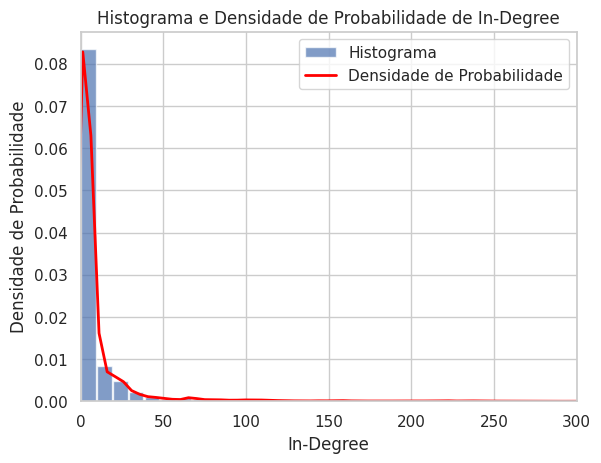

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_histogram(csv_file_path, num_bins=20, x_limit=None, bar_width=0.8):
    # Carregar dados do CSV usando o pandas
    data = pd.read_csv(csv_file_path)

    # Extrair a coluna 'indegree'
    indegree_data = data['indegree']

    # Plotar o histograma com um número específico de bins e largura de barra reduzida
    plt.hist(indegree_data, bins=num_bins, alpha=0.7, rwidth=bar_width, label='Histograma', density=True)

    # Plotar a curva de densidade de probabilidade suavizada
    sns.kdeplot(indegree_data, label='Densidade de Probabilidade', color='red', fill=False, linewidth=2, bw_method=0.1016)

    # Adicionar rótulos e título
    plt.xlabel('In-Degree')
    plt.ylabel('Densidade de Probabilidade')
    plt.title('Histograma e Densidade de Probabilidade de In-Degree')

    # Adicionar legenda
    plt.legend()

    # Definir limites para o eixo x, se especificado
    if x_limit:
        plt.xlim(x_limit)

    # Exibir o histograma
    plt.show()

# Substitua 'caminho/do/seu/arquivo.csv' pelo caminho real do seu arquivo CSV
csv_path = 'inDegree.csv'
plot_histogram(csv_path, num_bins=100, x_limit=(0, 300), bar_width=0.9)  # Ajuste conforme necessário


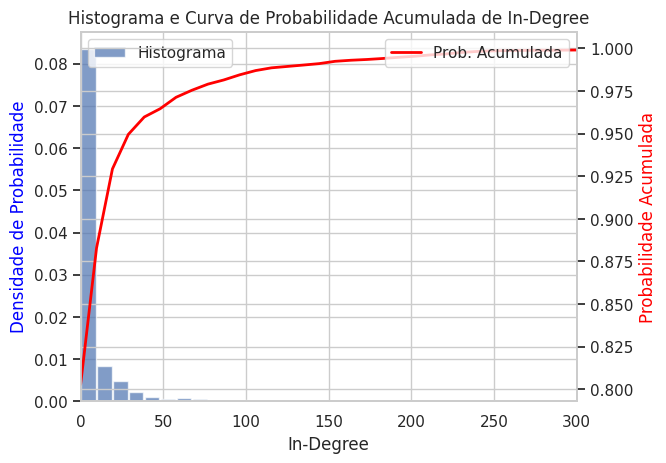

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_histogram_and_cumulative(csv_file_path, num_bins=20, x_limit=None, bar_width=0.8):
    # Carregar dados do CSV usando o pandas
    data = pd.read_csv(csv_file_path)

    # Extrair a coluna 'indegree'
    indegree_data = data['indegree']

    # Criar uma figura com subplots
    fig, ax1 = plt.subplots()

    # Plotar o histograma no primeiro subplot
    counts, bin_edges, _ = ax1.hist(indegree_data, bins=num_bins, alpha=0.7, density=True, label='Histograma', rwidth=bar_width)

    # Adicionar rótulos e título ao primeiro subplot
    ax1.set_xlabel('In-Degree')
    ax1.set_ylabel('Densidade de Probabilidade', color='blue')
    ax1.set_title('Histograma e Curva de Probabilidade Acumulada de In-Degree')

    # Calcular a curva de probabilidade acumulada manualmente
    cumulative_values = np.cumsum(counts * np.diff(bin_edges)[0])

    # Normalizar a curva de probabilidade acumulada para atingir 100%
    cumulative_values /= cumulative_values[-1]

    # Adicionar a curva de probabilidade acumulada no segundo subplot
    ax2 = ax1.twinx()
    ax2.plot(bin_edges[:-1], cumulative_values, color='red', linewidth=2, label='Prob. Acumulada')

    # Adicionar rótulos ao segundo subplot
    ax2.set_ylabel('Probabilidade Acumulada', color='red')

    # Adicionar legenda
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Definir limites para o eixo x, se especificado
    if x_limit:
        ax1.set_xlim(x_limit)

    # Exibir o gráfico
    plt.show()

# Substitua 'caminho/do/seu/arquivo.csv' pelo caminho real do seu arquivo CSV
csv_path = 'inDegree.csv'

# Exemplo de uso da função
plot_combined_histogram_and_cumulative(csv_path, num_bins=100, x_limit=(0, 300), bar_width=0.9)


Requisito #4:

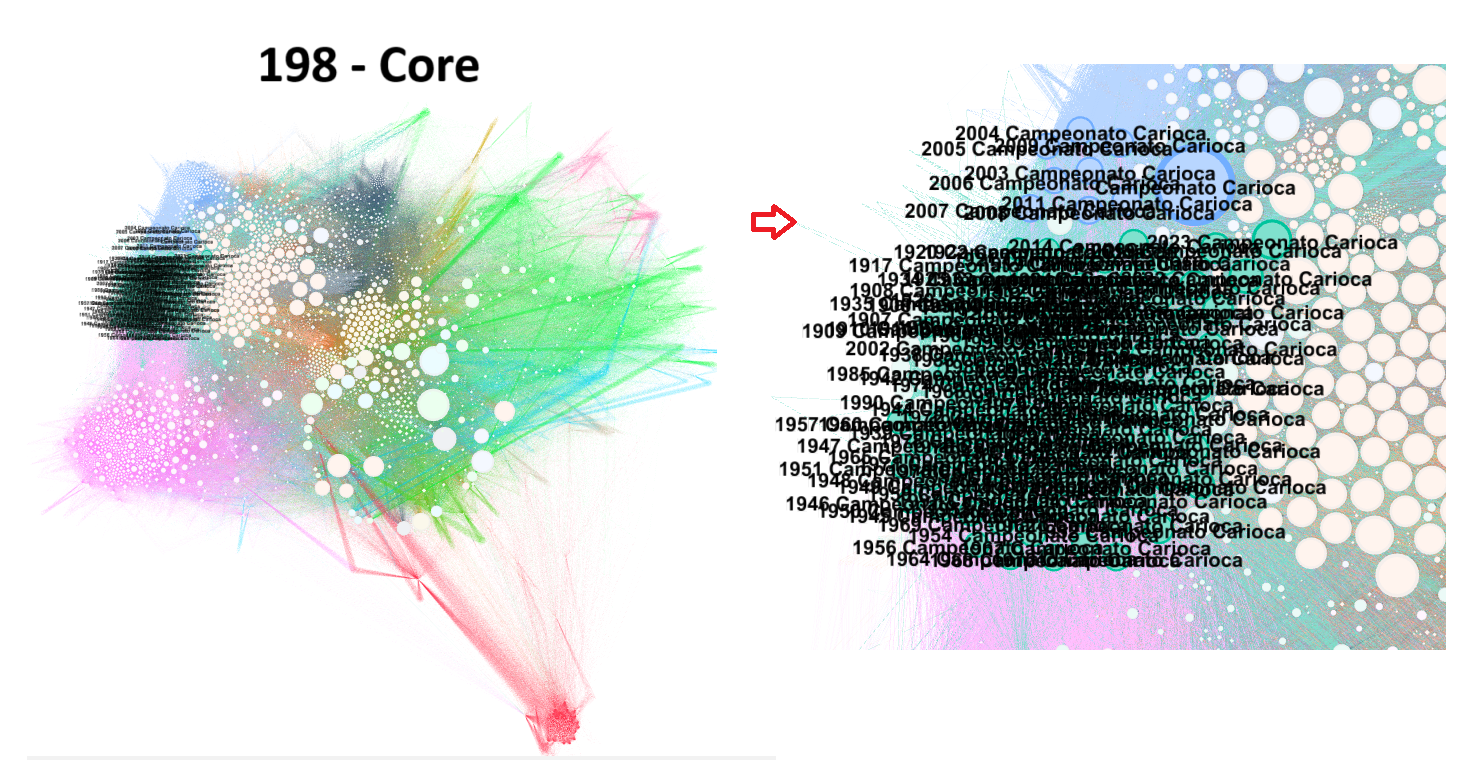